# CREATING MODEL RESULT TO AN EXCEL FILE

Update : 19.11.2022

Update Notes: FIXED-psd_list & parameters_list contains NaN values

# Libraries & Directory Info (or GDrive)

In [1]:
# Run these code block only for testing whether it works.
#file_nb = 236
#PALL_file = "Default"
#model_file = "Default"

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import math

If this python notebook will work in Google Colab, run the code below to connect Google Drive directory:

In [3]:
"""
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
"""

"\nfrom google.colab import drive\ndrive.mount('/gdrive')\n%cd /gdrive\n"

Otherwise choose a parent directory

Parent Driectory is the main folder you have your SWAN models. You need to run models in SWAN Software before run this notebook

In [4]:
parent_dir = r"C:\Users\pc\OneDrive_GTU\OneDrive - Gebze Teknik Üniversitesi\Tez\Proje\models2"

In [5]:
os.chdir(parent_dir)

In [6]:
mdate = glob.glob("model*")[file_nb]
date = mdate[6:]
date

'09301900'

In [7]:
os.chdir(parent_dir + '/' + 'model_' + date)

In [8]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 78BF-2C1B

 Directory of C:\Users\pc\OneDrive_GTU\OneDrive - Gebze Teknik šniversitesi\Tez\Proje\models2\model_09301900

10.12.2022  01:43    <DIR>          .
10.12.2022  01:43    <DIR>          ..
10.12.2022  00:56            31.525 19940930.xlsx_bottom.xlsx
10.12.2022  01:43             3.359 Default.prt
10.12.2022  01:43            18.593 Default.sp1
10.12.2022  01:43           953.204 Default.sp2
10.12.2022  00:56             1.177 Default.SWN
10.12.2022  01:43             3.370 Default_TRIAD.prt
10.12.2022  01:43            18.593 Default_TRIAD.sp1
10.12.2022  01:43           953.204 Default_TRIAD.sp2
10.12.2022  00:56             1.191 Default_TRIAD.SWN
10.12.2022  01:43             3.171 No_Dissipation.prt
10.12.2022  01:43            18.593 No_Dissipation.sp1
10.12.2022  01:43           953.204 No_Dissipation.sp2
10.12.2022  00:56             1.193 No_Dissipation.SWN
10.12.2022  01:43             3.182 No_Dissipation_TRI

# Read Spectrum Files

Read model result file (i.e. PALL.sp1 or Default.sp1 etc.) file line by line

In [9]:
with open(PALL_file + '.sp1') as f:
    lines = f.readlines()
n_of_loc = lines[4]
nofloc = n_of_loc.split()
# print(nofloc[0])

i is the number of location

In [10]:
i = int(nofloc[0])

In [11]:
locations = lines[5:i+5]
location_points = []
for j in range(len(locations)):
  location_points.append(locations[j].split())
# print(type(location_points))
locs = pd.DataFrame(location_points, columns=['X', 'Y'])
# print(locs)

### Locations of Gauges

In [12]:
gauge = pd.read_csv(parent_dir + "/.." + "/gauge_locations.csv")
# print(gauge)

In [13]:
gauge_names=[]
for ijk in range(len(locs)):
  gauge_names.append(str(gauge.loc[gauge['X'] == -1*float(locs['X'][ijk])].iloc[0, 0]))
# print(gauge_names)

In [14]:
locs["Gauge"] = gauge_names
# print(locs)

In [15]:
lines[i+6]
n_of_freq = lines[i+6]
noffreq = n_of_freq.split()
# print(noffreq[0])

f is the number of frequencies. (we have 39 in this example)

In [16]:
f = int(noffreq[0])

In [17]:
freqs = lines[i+6+1:i+6+1+f]
# print(len(freqs))
frequencies = []
for k in range(len(freqs)):
  #frequencies.append(freqs[k].split())
  frequencies.append(float(freqs[k].split()[0]))
frqs = pd.DataFrame(frequencies, columns=['Frequency'])
# print(frqs)

Each location also has 39 density

In [18]:
t = i+f+18
dens = lines[t:t+f+1]
density = []
for m in range(len(dens)):
  density.append(dens[m].split())
den = pd.DataFrame(density, columns=['Density (m^2/Hz)', 'Direction (degr)', 'Spreading (degr)'])
# print(den)

In [19]:
# DF frqs process
frqs.loc[-1] = [np.NaN]  # adding a row (for LOCATION info)
frqs.index = frqs.index + 1  # shifting index
frqs.sort_index(inplace=True) 
# print(frqs)

In [20]:
# Inserting to main DF other informations like Direction and Spreading
den.insert(0, "Frequency", frqs["Frequency"].to_list(), True)
# print(den)

Read Density, Direction and Directional Spreading in all locations

In [21]:
density=[]
for locnum in range(1,i+1): # i = number of location
  locnum1 = locnum-1
  dens = lines[t+locnum1*(f+1):t+locnum*(f+1)]
  for m in range(len(dens)):
    density.append(dens[m].split())
den = pd.DataFrame(density, columns=['Density (m^2/Hz)', 'Direction (degr)', 'Spreading (degr)'])
# print(den)

If you want to see densities in all location in a frame, run this code:

In [22]:
frequencies=[]
density=[]
for locnum in range(1,i+1): # i = number of location
  locnum1 = locnum-1
  dens = lines[t+locnum1*(f+1):t+locnum*(f+1)]
  for m in range(len(dens)):
    # If the line is start with LOCATION
    if len(dens[m].split()) == 2:
      density.append(dens[m].split()[0] + " " + dens[m].split()[1] )
      frequencies.append(float(frqs["Frequency"][m]))
    # If the line is No Data skip this line
    elif dens[m].split()[0] == "NODATA":
        None_list = ["LOCATION?", None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
        [ density.append(nl) for nl in None_list ]
        [ frequencies.append(float(frqs["Frequency"][x])) for x in range(40) ]
        #continue
    # If it is a data line
    else:
      density.append(float(dens[m].split()[0]))
      frequencies.append(float(frqs["Frequency"][m]))
dic = {"Frequency (Hz)": frequencies, "Density (m^2/Hz)": density}
datas = pd.DataFrame(dic)
# print(datas.head(40))

# Write Results

## Show results of locations in an Excel worksheet

In [23]:
# Convert lines to columns to see the differences between locations.
df0 = datas.iloc[0:40, :]
for t in range(1, int(len(datas)/40)):
    df1 = datas.iloc[t*40:(t+1)*40, 1:].reset_index(drop=True)
    df0 = pd.concat([df0, df1], axis=1, sort=False)
    df0 = df0.replace(-99, np.NaN)
df0.head(10)

,Frequency (Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz)
0,NaN,LOCATION 1,LOCATION 2,LOCATION 3,LOCATION 4,LOCATION 5,LOCATION 6,LOCATION 7,LOCATION 8,LOCATION 9,LOCATION 10,LOCATION 11,LOCATION 12,LOCATION 13,LOCATION 14,LOCATION 15
1,0.0400,0.000596,0.000495,0.000446,0.000436,0.000416,0.000406,0.0004,0.000389,0.00038,0.00036,0.00029,0.00027,0.000264,0.000241,0.000027
2,0.0440,0.000578,0.00048,0.000432,0.000422,0.000402,0.000393,0.000387,0.000376,0.000367,0.000347,0.000279,0.000259,0.000253,0.000231,0.000026
3,0.0484,0.001159,0.000958,0.000862,0.000842,0.000802,0.000784,0.000772,0.000748,0.00073,0.000689,0.00055,0.000512,0.0005,0.000455,0.000053
4,0.0532,0.002663,0.002195,0.001973,0.001927,0.001834,0.001791,0.001762,0.001708,0.001664,0.001567,0.001241,0.001153,0.001128,0.001026,0.000123
5,0.0586,0.002462,0.002021,0.001814,0.001772,0.001685,0.001645,0.001617,0.001565,0.001522,0.001429,0.001121,0.001041,0.001018,0.000926,0.000116
6,0.0644,0.001221,0.000997,0.000894,0.000873,0.000829,0.000809,0.000795,0.000768,0.000745,0.000697,0.000541,0.000501,0.00049,0.000445,0.000058
7,0.0709,0.00224,0.00182,0.00163,0.001589,0.001508,0.001471,0.001444,0.001393,0.001349,0.001256,0.000959,0.000888,0.000868,0.000786,0.00011
8,0.0779,0.002889,0.002332,0.002085,0.002032,0.001926,0.001877,0.001841,0.001771,0.001711,0.001584,0.001188,0.001097,0.001072,0.000967,0.000145
9,0.0857,0.005292,0.00424,0.003785,0.003685,0.003488,0.003396,0.003329,0.003193,0.003075,0.002827,0.002073,0.001908,0.001862,0.001669,0.000275


### Model Parameters

To create a excel file of model result, some information about model is needed.

In [24]:
# Using readlines()
file1 = open(model_file + '.SWN', 'r')
Lines = file1.readlines()
  
count = 0
# Strips the newline character
for line in Lines:
    count += 1
    # print("Line{}: {}".format(count, line.strip()))
    cur_line = line.strip()
    if cur_line.startswith("GEN"):
        wcap = count + 1
        breaking = wcap + 1
        fric = breaking + 1

In [25]:
if Lines[wcap][:-1] == "OFF WCAP":
    WhiteCapping = "OFF"
else:
    WhiteCapping = "ON"
if Lines[breaking][:-1] == "OFF BREAKING":
    Breaking = "OFF"
else:
    Breaking = "ON"
if Lines[fric][:13] == "FRIC JONSWAP":
    Friction = "JONSWAP (Hasselmann et al., 1973, JONSWAP)"
    cfjon = float(0.038)
elif Lines[fric].startswith("FRIC JONSWAP") and len(Lines[fric]) > 12:
    Friction = "JONSWAP (Hasselmann et al., 1973, JONSWAP)"
    cfjon = float(Lines[fric][13:])
elif Lines[fric][:13] == "!FRIC JONSWAP":
    #elif Lines[fric].startswith("!FRIC JONSWAP"):
    Friction = "Deactivated"    
else:
    Friction = "Error"

In [26]:
# print(Lines[6])
if Lines[6][:5] == "CGRID" and Lines[6].split(" ")[6] == "0.":
    if Lines[6][6:13] == "REGULAR":
        CGrid = "1D Uniform and Rectangular"
        xlen = int(Lines[6].split(" ")[5])
        xmesh = int(Lines[6].split(" ")[7])
    elif Lines[6][6:13] == "CURVILINEAR":
        CGrid = "1D Curvilinear"
        xlen = int(Lines[6].split(" ")[5])
        xmesh = int(Lines[6].split(" ")[7])
    else:
        CGrid = ""
elif Lines[6].split(" ")[6] != "0.":
        CGrid = "2D Computational Grid"

Lines = Lines of nodissip2.SWN file

lines = Lines of PALL.sp1 file

## Bottom Profile (Chart in Excel)

In [27]:
# Using readlines()
file1 = open('profile11.BOT', 'r')
Lines = file1.readlines()
  
count = 0
bot_locations = []
# Strips the newline character
for line in Lines:
    count += 1
    # print("Line{}: {}".format(count, line.strip()))
    current_line = line.strip()
    bot_locations.append(float(current_line))
#print(bot_locations)

In [28]:
bot_locations.sort()
multiple = -1
bot_locations = [x*-1 for x in bot_locations]
# print(bot_locations)

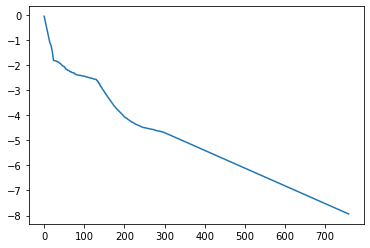

In [29]:
plt.plot(bot_locations)

In [30]:
bottom = pd.Series(bot_locations)
bottom

0     -0.051331
1     -0.124970
2     -0.205862
3     -0.271520
4     -0.336172
         ...   
754   -7.907551
755   -7.914625
756   -7.921700
757   -7.928774
758   -7.935848
Length: 759, dtype: float64

In [31]:
bot_x_values = []
for x_bot in range(len(bottom)):
    bot_x_values.append(885 - x_bot)
bot_x_values.sort()

In [32]:
bottom_profile = pd.DataFrame({'X': bot_x_values, 'Elevation': bottom})
bottom_profile

,X,Elevation
0,127,-0.051331
1,128,-0.124970
2,129,-0.205862
3,130,-0.271520
4,131,-0.336172
...,...,...
754,881,-7.907551
755,882,-7.914625
756,883,-7.921700
757,884,-7.928774


## Sensor Spectrum Data Measurements

This section will extract to excel file all measurements in sensor points.

In [33]:
Spec_loc = r"C:\Users\pc\OneDrive_GTU\OneDrive - Gebze Teknik Üniversitesi\Tez\Proje\Dissipation Projects\11 - Herbers et al. (2006) - (DUCK94)\Spectra\Python Fit Datasets"

In [34]:
date[0:2]

'09'

In [35]:
xls = pd.ExcelFile(Spec_loc + "\\" + date[0:2] + "_Fit_Data\\" + date + "_Fit_Data.xlsx")
spectrums_measurements = xls.sheet_names

In [36]:
spectrums_measurements[0][-3:]

'p23'

In [37]:
p01 =[-124.94, "LOCATION 0 (p01)"]
p02 =[-135.01, "LOCATION 1"]
p03 =[-145.42, "LOCATION 2"]
p04 =[-160.77, "LOCATION 3"]
p05 =[-169.50, "LOCATION 4"]
p23 =[-190.20, "LOCATION 5"]
p26 =[-190.20, "LOCATION 5"]
p12 =[-205.34, "LOCATION 6"]
p13 =[-220.23, "LOCATION 7"]
p14 =[-240.55, "LOCATION 8"]
p16 =[-252.03, "LOCATION 9"]
p15 =[-264.70, "LOCATION 10"]
p17 =[-320.37, "LOCATION 11"]
p45 =[-370.08, "LOCATION 12"]
p18 =[-398.39, "LOCATION 13"]
p19 =[-480.34, "LOCATION 14"]
p87 =[-884.11, "LOCATION 15"]

In [38]:
first_column = pd.read_excel(Spec_loc + "\\" + date[0:2] + "_Fit_Data\\" + date + "_Fit_Data.xlsx", index_col=None) .iloc[:, [1]]
first_column.rename(columns = {'Freq':'Frequency (Hz)'}, inplace = True)

In [39]:
gauges_p = ["ppp02", "ppp03", "ppp04", "ppp05", "ppp23", "ppp12", "ppp13", "ppp14", "ppp16", "ppp15", "ppp17", "ppp45", "ppp18", "ppp19", "ppp87"]

In [40]:
all_gauge_names = []
for g in range(15):
    all_gauge_names.append(date + "." + str(gauges_p[g]))

In [41]:
sens_locs = [-1*p02[0], -1*p03[0], -1*p04[0], -1*p05[0], -1*p23[0], -1*p12[0], -1*p13[0], -1*p14[0], -1*p16[0], -1*p15[0], -1*p17[0], -1*p45[0], -1*p18[0], -1*p19[0], -1*p87[0]]
sens_locs_y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sens_locs

[135.01,
 145.42,
 160.77,
 169.5,
 190.2,
 205.34,
 220.23,
 240.55,
 252.03,
 264.7,
 320.37,
 370.08,
 398.39,
 480.34,
 884.11]

In [42]:
Sensors = pd.DataFrame({'Pressure Gauges': gauges_p, 'Gauges Location (X)': sens_locs, 'Gauges Location (Y)': sens_locs_y})
#Sensors

### Creating Sensor Spectrum Measurement Table

In [43]:
first_column.loc[-1] = ""  # adding location row as empty
first_column.index = first_column.index + 1  # shifting index
first_column.sort_index(inplace=True)
spec_meas = pd.DataFrame()
spec_meas = pd.concat([first_column, spec_meas], axis=1)
say = -1 # counter //
for gn in all_gauge_names:
    say += 1
    try: # if there is a measurement in that location
        testt = pd.read_excel(Spec_loc + "\\" + date[0:2] + "_Fit_Data\\" + date + "_Fit_Data.xlsx", index_col=None, sheet_name=gn, names=["X", "Frequency (Hz)", "Y", "Density (m^2/Hz)"]).iloc[:, [3]]
        testt.loc[-1] = locals()[all_gauge_names[say][-3:]][1]
        testt.index = testt.index + 1  # shifting index
        testt.sort_index(inplace=True)
    except: # if not, keep the column empty
        testt = pd.DataFrame(columns=["Density (m^2/Hz)"])
        testt.loc[-1] = locals()[all_gauge_names[say][-3:]][1]
        testt.index = testt.index + 1  # shifting index
        testt.sort_index(inplace=True)
    spec_meas = pd.concat([spec_meas, testt], axis=1)
spec_meas = spec_meas.replace({np.nan: None})
print(spec_meas)

    Frequency (Hz) Density (m^2/Hz) Density (m^2/Hz) Density (m^2/Hz)  \
0                        LOCATION 1       LOCATION 2       LOCATION 3   
1           0.0176             None             None             None   
2           0.0225             None             None             None   
3           0.0273             None             None             None   
4           0.0322             None             None             None   
..             ...              ...              ...              ...   
197         0.9746             None             None             None   
198         0.9795             None             None             None   
199         0.9844             None             None             None   
200         0.9893             None             None             None   
201         0.9941             None             None             None   

    Density (m^2/Hz) Density (m^2/Hz) Density (m^2/Hz) Density (m^2/Hz)  \
0         LOCATION 4       LOCATION 5       LOCA

### Boundary Sensor Measurements

The location of the most offshore sensor is used for comparation. This example that location is Location 15 (-884.11, 0.00) and it is pressure sensor pp87

This section is *not* extracting to excel file. But using for calculations of model parameters.

In [44]:
# Using readlines()
file1 = open('sinir.SP1', 'r')
Lines = file1.readlines()
  
#count = 0
boun_freq = []
boun_dens = []
# Strips the newline character

my_lines = []
for line in Lines:
    count += 1
    current_line = line.strip()
    my_lines.append(current_line)
nof_freq = int(my_lines[7].split(" ")[0])
for frq in range(8, nof_freq+8):
    boun_freq.append(float(my_lines[frq]))
for dnst in range(nof_freq+20, nof_freq+20+nof_freq):
    boun_dens.append(float((format(float(my_lines[dnst].split()[0]), '.5f'))))

In [45]:
boun_df = pd.DataFrame({'Frequency (Hz)': boun_freq, 'Density (m^2/Hz)': boun_dens})
boun_df.fillna(method='ffill', inplace=True)
boun_df.fillna(method='bfill', inplace=True)
boun_df
# boun_df[(boun_df["Frequency (Hz)"] < 0.27) & (boun_df["Frequency (Hz)"] > 0.26)]

,Frequency (Hz),Density (m^2/Hz)
0,0.0176,0.00839
1,0.0225,0.00454
2,0.0273,0.00263
3,0.0322,0.00205
4,0.0371,0.00275
...,...,...
196,0.9746,121.00000
197,0.9795,117.00000
198,0.9844,113.00000
199,0.9893,105.00000


### Spectral Analysis Parameters

Some parameters about wave model can derived with using FFT Spectral Analysis

These parameters are calculated from sensor data and SWAN results data.

 +In this section S.A.P and SAP defines Spectral Analysis Parameters

In [46]:
def SAP(psd, fx):
    """
    Calculation of Spectral Analysis Parameters (SAP)
    """
    m0=np.trapz(psd,fx)
    m1=np.trapz(psd*fx,fx)
    m2=np.trapz(psd*fx*fx,fx)
    m4=np.trapz(psd*fx*fx*fx*fx, fx)
    T01=m0/m1
    T02=math.sqrt(m0/m2)
    #print('m0 =',m0,'\nm1 =',m1,'\nm2 =',m2,'\nT01 =',T01,'\nT02 =',T02)
    Hm0=math.sqrt(m0)*4
    #print('Hm0 =',Hm0)
    s_bandwidth = math.sqrt(1 - (m2**2/m0*m4))
    s_width = math.sqrt((m0*m2/m1**2)-1)
    #print("Spectral Bandwidth (𝜀) =", s_bandwidth, '\nSpectral Width (v) =', s_width)
    fp = 1/T02
    #print("Peak Frequency =", fp)
    return m0,m1,m2,T01,T02,Hm0,s_bandwidth,s_width,fp

In [47]:
df0

,Frequency (Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz)
0,NaN,LOCATION 1,LOCATION 2,LOCATION 3,LOCATION 4,LOCATION 5,LOCATION 6,LOCATION 7,LOCATION 8,LOCATION 9,LOCATION 10,LOCATION 11,LOCATION 12,LOCATION 13,LOCATION 14,LOCATION 15
1,0.0400,0.000596,0.000495,0.000446,0.000436,0.000416,0.000406,0.0004,0.000389,0.00038,0.00036,0.00029,0.00027,0.000264,0.000241,0.000027
2,0.0440,0.000578,0.00048,0.000432,0.000422,0.000402,0.000393,0.000387,0.000376,0.000367,0.000347,0.000279,0.000259,0.000253,0.000231,0.000026
3,0.0484,0.001159,0.000958,0.000862,0.000842,0.000802,0.000784,0.000772,0.000748,0.00073,0.000689,0.00055,0.000512,0.0005,0.000455,0.000053
4,0.0532,0.002663,0.002195,0.001973,0.001927,0.001834,0.001791,0.001762,0.001708,0.001664,0.001567,0.001241,0.001153,0.001128,0.001026,0.000123
5,0.0586,0.002462,0.002021,0.001814,0.001772,0.001685,0.001645,0.001617,0.001565,0.001522,0.001429,0.001121,0.001041,0.001018,0.000926,0.000116
6,0.0644,0.001221,0.000997,0.000894,0.000873,0.000829,0.000809,0.000795,0.000768,0.000745,0.000697,0.000541,0.000501,0.00049,0.000445,0.000058
7,0.0709,0.00224,0.00182,0.00163,0.001589,0.001508,0.001471,0.001444,0.001393,0.001349,0.001256,0.000959,0.000888,0.000868,0.000786,0.00011
8,0.0779,0.002889,0.002332,0.002085,0.002032,0.001926,0.001877,0.001841,0.001771,0.001711,0.001584,0.001188,0.001097,0.001072,0.000967,0.000145
9,0.0857,0.005292,0.00424,0.003785,0.003685,0.003488,0.003396,0.003329,0.003193,0.003075,0.002827,0.002073,0.001908,0.001862,0.001669,0.000275


Defining Spectral Analysis Parameters (S.A.P) according to SWAN Results Data

In [48]:
#Frequency column in df0 (SWAN) dataframe
fx1 = df0.iloc[1:, 0].to_numpy(dtype='float')
#Frequency column in spec_meas (Sensor Data) dataframe
fx2 = spec_meas.iloc[1:, 0].to_numpy(dtype='float')


#psd1 = df0.iloc[1:, 1].to_numpy(dtype='float')

In [49]:
psd_list = []
for cols in range(len(df0.columns)-1):
    psd_list.append(df0.iloc[1:, cols+1].to_numpy(dtype='float'))
# In case of the psd_list contains any NaN value
for ixn in range(len(psd_list)):
    for idnx in range(len(psd_list[ixn])):
        if np.isnan(psd_list[ixn][idnx]):
            psd_list[ixn][idnx] = 0

In [50]:
parameters_list = []
for cols in range(len(df0.columns)-1):
    parameters_list.append(SAP(psd_list[cols], fx1))
# In case of the parameters_list contains any NaN value
for ixn2 in range(len(parameters_list)):
    for idnx2 in range(len(parameters_list[ixn2])):
        if np.isnan(parameters_list[ixn2][idnx2]):
            parameters_list_tup = list(parameters_list[ixn2])
            parameters_list_tup[idnx2] = float(0)
            parameters_list[ixn2] = tuple(parameters_list_tup)

ValueError: math domain error

In [51]:
names_of_parameters = ["m0","m1","m2","T01","T02","Hm0","Spectral Bandwidth (𝜀)", "Spectral Width (v)", "fp"]

In [52]:
parameters_list[0]

(0.032706939843149985,
 0.0034451399265381243,
 0.00043016767116882214,
 9.493646278691445,
 8.719690534921492,
 0.7234024035696867,
 0.9999999999388614,
 0.43057791591264677,
 0.11468296907959057)

In [80]:
spec_meas

,Frequency (Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz),Density (m^2/Hz)
0,,LOCATION 1,LOCATION 2,LOCATION 3,LOCATION 4,LOCATION 5,LOCATION 6,LOCATION 7,LOCATION 8,LOCATION 9,LOCATION 10,LOCATION 11,LOCATION 12,LOCATION 13,LOCATION 14,LOCATION 15
1,0.0176,34.200001,4.41,12.6,0.0167,17.500002,0.00917,0.0197,0.0305,None,0.0317,0.015,0.0116,0.0162,0.0163,0.00937
2,0.0225,8.04,5.89,7.96,0.00955,4.61,0.0167,0.0321,0.0378,None,0.0282,0.0204,0.0168,0.0164,0.0101,0.00647
3,0.0273,12.6,3.57,11.3,0.008,4.58,0.0421,0.0434,0.0265,None,0.0228,0.0171,0.0137,0.0151,0.0106,0.00651
4,0.0322,11.000001,4.61,7.07,0.0124,6.83,0.0309,0.0202,0.014,None,0.0191,0.0117,0.0102,0.00895,0.00747,0.00483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.8623,0.280599,0.36103,1.042323,0.000024,0.038316,0.000048,0.000082,0.000019,None,0.000006,0.000006,0.000005,0.000007,0.000006,0.000007
175,0.8672,0.270357,0.349477,0.999171,0.000022,0.034672,0.000044,0.000081,0.000018,None,0.000005,0.000006,0.000005,0.000007,0.000006,0.000007
176,0.8721,0.253946,0.320611,0.932526,0.000022,0.031704,0.00004,0.000079,0.000017,None,0.000005,0.000005,0.000004,0.000006,0.000006,0.000007
177,0.877,0.236221,0.294032,0.906229,0.00002,0.031191,0.000039,0.000075,0.000016,None,0.000005,0.000005,0.000004,0.000006,0.000005,0.000007


In [53]:
psd_list2 = []
for cols in range(len(spec_meas.columns)-1):
    psd_list2.append(spec_meas.iloc[1:, cols+1].to_numpy(dtype='float'))

In [54]:
parameters_list2 = []
for cols in range(len(spec_meas.columns)-1):
    if not np.isnan(SAP(psd_list2[cols], fx2)[0]):
        parameters_list2.append(SAP(psd_list2[cols], fx2))
    else:
        parameters_list2.append([None for y in range(9)])

ValueError: math domain error

In [ ]:
psd2 = df0.iloc[1:, -1].to_numpy(dtype='float')
fx2 = df0.iloc[1:, 0].to_numpy(dtype='float')

In [ ]:
plt.plot(fx2, psd2)
m_0=np.trapz(psd2,fx2)
m_1=np.trapz(psd2*fx2,fx2)
m_2=np.trapz(psd2*fx2*fx2,fx2)
m_4=np.trapz(psd2*fx2*fx2*fx2*fx2, fx2)
T_01=m_0/m_1
T_02=math.sqrt(m_0/m_2)
print('m0 =',m_0,'\nm1 =',m_1,'\nm2 =',m_2,'\nT01 =',T_01,'\nT02 =',T_02)
Hm_0=math.sqrt(m_0)*4
print('Hm0 =',Hm_0)
s_bandwidth2 = math.sqrt(1 - (m_2**2/m_0*m_4))
s_width2 = math.sqrt((m_0*m_2/m_1**2)-1)
print("Spectral Bandwidth (𝜀) =", s_bandwidth2, '\nSpectral Width (v) =', s_width2)
fp2 = 1/T_02
print("Peak Frequency =", fp2)
plt.show()

## Create Excel File

In [ ]:
spec_meas

In [ ]:
for loc_n in range(1,len(spec_meas.loc[0])-1):
    if not spec_meas.loc[1][-1*loc_n] == None:
        boundary_location = spec_meas.loc[0][-1*loc_n]
        boun_location_number = (len(spec_meas.loc[0]))-loc_n
        break

In [ ]:
boundary_location

In [ ]:
boun_location_number

In [ ]:
spec_meas.iloc[1:2,boun_location_number:boun_location_number+1]

In [ ]:
df0

In [ ]:
writer = pd.ExcelWriter(date + '_' + PALL_file + '_Model_Results.xlsx', engine='xlsxwriter')
df0.to_excel(writer, sheet_name='Sheet1', startrow=12, startcol=2)
bottom_profile.to_excel(writer, sheet_name='Sheet1', startrow=1, startcol=35)
# boun_df is spectrums data in boundary sensor
#boun_df.to_excel(writer, sheet_name='Sheet1', startrow=44, startcol=2)
spec_meas.to_excel(writer, sheet_name='Sheet1', startrow=66, startcol=2)
Sensors.to_excel(writer, sheet_name='Sheet1', startrow=1, startcol=39)
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

#########
spec_meas.iloc[1:2,boun_location_number:boun_location_number+1].to_excel(writer, sheet_name='Sheet2')
worksheet2 = writer.sheets['Sheet2']
chart_sheet2 = workbook.add_chart({'type': 'scatter',
                             'subtype': 'straight'})
chart_sheet2.add_series({
    'name':       '=Sheet1!$R$3',
    'categories': '=Sheet1!$D$3:$D$42',
    'values':     '=Sheet1!$R$2:$R$42',
})

chart_sheet2.add_series({
    'name':       '=Sheet1!$R$46',
    'categories': '=Sheet1!$D$46:$D$247',
    'values':     '=Sheet1!$R$46:$R$247',
})
worksheet2.insert_chart('A4', chart_sheet2, {'x_offset': 25, 'y_offset': 10, 'x_scale':2, 'y_scale':2})
#########
####
# S.A.P #
for k in range(len(names_of_parameters)):
    worksheet.write(k+1,2, names_of_parameters[k])
for t in range(len(parameters_list)):
    for j in range(len(parameters_list[t])):
        worksheet.write(j+1,t+4, parameters_list[t][j])
        
# S.A.P #

# S.A.P for Sensor Data#
for k in range(len(names_of_parameters)):
    worksheet.write(k+55,2, names_of_parameters[k])
for t in range(len(parameters_list2)):
    for j in range(len(parameters_list2[t])):
        worksheet.write(j+55,t+4, parameters_list2[t][j])
        


#######################################################################
#
# Create a scatter chart sub-type with straight lines and no markers.
#
chart3 = workbook.add_chart({'type': 'scatter',
                             'subtype': 'straight'})

# Configure the first series.

chart3.add_series({
    'name':       '=Sheet1!$E$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$E$15:$E$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$F$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$F$15:$F$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$G$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$G$15:$G$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$H$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$H$15:$H$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$I$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$I$15:$I$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$J$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$J$15:$J$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$K$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$K$15:$K$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$L$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$L$15:$L$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$M$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$M$15:$M$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$N$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$N$15:$N$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$O$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$O$15:$O$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$P$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$P$15:$P$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$Q$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$Q$15:$Q$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$R$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$R$15:$R$53',
})
# Configure second series.
chart3.add_series({
    'name':       '=Sheet1!$S$14',
    'categories': '=Sheet1!$D$14:$D$53',
    'values':     '=Sheet1!$S$15:$S$53',
})


# Add a chart title and some axis labels.
chart3.set_title ({'name': 'SWAN Model Results', })
chart3.set_x_axis({'name': 'Frequency (Hz)'})
chart3.set_y_axis({'name': 'Density (m^2/Hz)'})

# Set an Excel chart style.
chart3.set_style(2)

# Insert the chart into the worksheet (with an offset).
worksheet.insert_chart('U4', chart3, {'x_offset': 25, 'y_offset': 10, 'x_scale':2, 'y_scale':2})

################# END of Chart #####################################

### Bottom Profile Chart ###

chart4 = workbook.add_chart({'type': 'scatter'})
#chart4 = workbook.add_chart({'type', 'line'})
"""
chart4.add_series({
    'values': '=Sheet1!$AL$3:$AL$773',
    'line':   {'color': 'red'},
})
"""

chart4.add_series({
    'name':'Bottom Profile',
    'categories': '=Sheet1!$AK$3:$AK$783',
    'values':     '=Sheet1!$AL$3:$AL$783',
})

sensor_points = workbook.add_chart({'type': 'scatter'})

sensor_points.add_series({
    'categories': '=Sheet1!$AP$3:$AP$17',
    'values':     '=Sheet1!$AQ$3:$AQ$17',
})

chart4.add_series({
    'name':'Sensors',
    'categories': '=Sheet1!$AP$3:$AP$17',
    'values':     '=Sheet1!$AQ$3:$AQ$17',
})

chart4.combine(sensor_points)

# Add a chart title and some axis labels.
chart4.set_title ({'name': 'Wave Model Bottom Profile'})
chart4.set_x_axis({'name': 'Distance (x)', 'label_position': 'low', 'min': 100, 'max': 885})
chart4.set_y_axis({'name': 'Elevation (m)'})
chart4.set_legend({'none': False, 'position': 'bottom'})
worksheet.insert_chart('U35', chart4, {'x_scale':2, 'y_scale':2})



### END of Bottom Chart ###
"""
### Boundary Sensor Chart ###
#
chart1 = workbook.add_chart({'type': 'scatter',
                             'subtype': 'straight'})

# Configure the first series.

chart1.add_series({
    'name':       'Measurement',
    'categories': '=Sheet1!$D$46:$D$246',
    'values':     '=Sheet1!$E$46:$E$246',
})
# Configure second series.
chart1.add_series({
    'name':       'SWAN Result',
    'categories': '=Sheet1!$D$3:$D$42',
    'values':     '=Sheet1!$S$2:$S$42',
})

chart1.set_title ({'name': 'Comparasion of SWAN Result & Sensor Data', })
chart1.set_x_axis({'name': 'Frequency (Hz)'})
chart1.set_y_axis({'name': 'Density (m^2/Hz)'})


worksheet.insert_chart('G46', chart1, {'x_scale':1.7, 'y_scale':1.7})

### END of Sensor Chart ###
"""

### Spectrum Chart of Sensors ###
#
chart11 = workbook.add_chart({'type': 'scatter',
                             'subtype': 'straight'})

# Configure the first series.

chart11.add_series({
    'name':       '=Sheet1!$E$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$E$69:$E$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$F$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$F$69:$F$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$G$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$G$69:$G$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$H$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$H$69:$H$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$I$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$I$69:$I$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$J$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$J$69:$J$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$K$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$K$69:$K$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$L$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$L$69:$L$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$M$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$M$69:$M$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$N$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$N$69:$N$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$O$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$O$69:$O$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$P$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$P$69:$P$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$Q$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$Q$69:$Q$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$R$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$R$69:$R$269',
})
# Configure second series.
chart11.add_series({
    'name':       'Sheet1!$S$68',
    'categories': '=Sheet1!$D$69:$D$269',
    'values':     '=Sheet1!$S$69:$S$269',
})


chart11.set_title ({'name': 'Spectrum Data of Sensors', })
chart11.set_x_axis({'name': 'Frequency (Hz)'})
chart11.set_y_axis({'name': 'Density (m^2/Hz)'})


worksheet.insert_chart('U65', chart11, {'x_scale':2, 'y_scale':2})

### END of Sensor Chart ###


merge_format = workbook.add_format({
    'bold': 1,
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'fg_color': '#c6e2ff'})
merge_format2 = workbook.add_format({
    'bold': 1,
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'fg_color': '#97ffff'})
merge_format3 = workbook.add_format({
    'bold': 1,
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'fg_color': '#DAEEF3'})
merge_format4 = workbook.add_format({
    'bold': 1,
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'fg_color': '#FFFFFF',
    'font_size': 20})
merge_format5 = workbook.add_format({
    'bold': 1,
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'fg_color': '#FCD5B4'})


worksheet.merge_range('A1:B1', 'Model Parameters', merge_format2)
worksheet.merge_range('A8:B8', '', merge_format2)
worksheet.merge_range('C1:S1', 'Spectral Analysis Parameters according to SWAN Wave Model Results', merge_format)
worksheet.merge_range('C12:S12', 'SWAN Wave Model Results in Different Locations', merge_format)
worksheet.merge_range('C55:S55', 'Spectral Analysis Parameters according to Sensor Spectrum Data', merge_format5)
worksheet.merge_range('C66:S66', 'Sensor Spectrum Data in Different Locations', merge_format5)

worksheet.merge_range('AJ1:AL1', 'Bottom Profile', merge_format3)
####### Model Parameters ########


worksheet.write('A2', "White Capping")
worksheet.write('A3', "Breaking Dissipation")
worksheet.write('A4', "Bottom Friction")
worksheet.write('A5', "Comp. Grid")
worksheet.write('A6', "Length in x")
worksheet.write('A7', "Number of Mesh in x")
worksheet.write('B2', WhiteCapping)
worksheet.write('B3', Breaking)
worksheet.write('B5', CGrid)
worksheet.write('B6', xlen)
worksheet.write('B7', xmesh)

if 'cfjon' in globals():
    worksheet.write('B4', Friction + " JONSWAP Coefficent: " + cfjon)
else:
    worksheet.write('B4', Friction)

#####################################################

### locations of sensors ###

worksheet.merge_range('A44:B44', 'Locations of Sensors', merge_format2)
worksheet.write('A45', "p02")
worksheet.write('B45', p02[1] + " (" + str(p02[0]) + ", 0)")

worksheet.write('A46', "p03")
worksheet.write('B46', p03[1] + " (" + str(p03[0]) + ", 0)")

worksheet.write('A47', "p04")
worksheet.write('B47', p04[1] + " (" + str(p04[0]) + ", 0)")

worksheet.write('A48', "p05")
worksheet.write('B48', p05[1] + " (" + str(p05[0]) + ", 0)")

worksheet.write('A49', "p23")
worksheet.write('B49', p23[1] + " (" + str(p23[0]) + ", 0)")

worksheet.write('A50', "p26")
worksheet.write('B50', p26[1] + " (" + str(p26[0]) + ", 0)")

worksheet.write('A51', "p12")
worksheet.write('B51', p12[1] + " (" + str(p12[0]) + ", 0)")

worksheet.write('A52', "p13")
worksheet.write('B52', p13[1] + " (" + str(p13[0]) + ", 0)")

worksheet.write('A53', "p14")
worksheet.write('B53', p14[1] + " (" + str(p14[0]) + ", 0)")

worksheet.write('A54', "p16")
worksheet.write('B54', p16[1] + " (" + str(p16[0]) + ", 0)")

worksheet.write('A55', "p15")
worksheet.write('B55', p15[1] + " (" + str(p15[0]) + ", 0)")

worksheet.write('A56', "p17")
worksheet.write('B56', p17[1] + " (" + str(p17[0]) + ", 0)")

worksheet.write('A57', "p45")
worksheet.write('B57', p45[1] + " (" + str(p45[0]) + ", 0)")

worksheet.write('A58', "p18")
worksheet.write('B58', p18[1] + " (" + str(p18[0]) + ", 0)")

worksheet.write('A59', "p19")
worksheet.write('B59', p19[1] + " (" + str(p19[0]) + ", 0)")

worksheet.write('A60', "p87")
worksheet.write('B60', p87[1] + " (" + str(p87[0]) + ", 0)")
### END of locations of sensors ###

worksheet.set_zoom(50)
worksheet.set_column('A:B', 21)
worksheet.set_column('C:C', 11)
worksheet.set_column('T:T', 2.55)
worksheet.set_column('AJ:AJ', 3.55)
worksheet.set_column('AK:AK', 4)


worksheet.merge_range('A17:B24', 'Model ' + date, merge_format4)


writer.save()

In [ ]:
date + '_' + PALL_file + '_Model_Results.xlsx'

In [ ]:
#file_nb += 1
print("file_nb = ", file_nb)

In [ ]:
%ls

# Extra section

THOSE CODES ARE NOT neccessary in my project

If you want to see densities, spreadings and directions, run codes below:

PS: All locations will show in different sheet

In [ ]:
"""
frequencies=[]
density=[]
direction=[]
spreading=[]
for locnum in range(1,i+1): # i = number of location
  locnum1 = locnum-1
  dens = lines[t+locnum1*(f+1):t+locnum*(f+1)]
  for m in range(len(dens)):
    # If the line is start with LOCATION
    if len(dens[m].split()) == 2:
      density.append(dens[m].split()[0])
      direction.append(int(dens[m].split()[1]))
      spreading.append(np.NaN)
      frequencies.append(float(frqs["Frequency"][m]))
    # If it is a data line
    else:
      density.append(float(dens[m].split()[0]))
      direction.append(float(dens[m].split()[1]))
      spreading.append(float(dens[m].split()[2]))
      frequencies.append(float(frqs["Frequency"][m]))
dic = {"Frequency": frequencies, "Density (m^2/Hz)": density, "Direction": direction, "Spreading": spreading}
datas = pd.DataFrame(dic)
print(datas)
"""

In [ ]:
# os.chdir(parent_dir + '/' + 'model_' + date)

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
"""
writer = pd.ExcelWriter("model_result.xlsx", engine='xlsxwriter')

for que in range(0, i):
  data_excel = datas.iloc[que*40:(que+1)*40, :]
  data_excel.to_excel(writer, sheet_name=str(locs["Gauge"][int(datas["Direction"][que*40])-1]))
writer.save()
"""

In [ ]:
writer.close()